<center>
<h1> Credit Card Segmentation
</center>

### Business Context:
### To develop a customer segmentation to define marketing strategy. The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

#### Advanced data preparation: Build an ‘enriched’ customer profile by deriving “intelligent” KPIs such as:
- Monthly average purchase and cash advance amount
- Purchases by type (one-off, installments)
- Average amount per purchase and cash advance transaction,
- Limit usage (balance to credit limit ratio),
- Payments to minimum payments ratio etc.

#### Advanced reporting: Use the derived KPIs to gain insight on the customer profiles.
#### Identification of the relationships/ affinities between services.
#### Clustering: Apply a data reduction technique factor analysis for variable reduction technique and a clustering algorithm to reveal the behavioural segments of credit card holders
#### Identify cluster characterisitics of the cluster using detailed profiling.
#### Provide the strategic insights and implementation of strategies for given set of cluster characteristics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling   

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

In [2]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.metrics as metrics

#### Importing data

In [3]:
cust = pd.read_csv('C:/Users/mynsh\OneDrive/Desktop/Final Projects/Case Studies/Case Study (Unsupervised learning)/CC_GENERAL.csv')

In [4]:
cust.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# Dropping insignificant variable
cust.drop(columns='CUST_ID',inplace=True)

#### Missing Values treatment

In [7]:
cust.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

cust=cust.apply(lambda x: Missing_imputation(x))

In [9]:
cust.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Deriving the Key Performance Indicators(KPIs)

#### Monthly_avg_purchase and cash_advance_amount

In [10]:
cust['monthly_avg_purchase']=cust['PURCHASES']/cust['TENURE']

In [11]:
cust['cash_advance_amount']=cust['CASH_ADVANCE']/cust['TENURE']

####  Purchase by types (one-off, installments)

In [12]:
def purchase_type(df):
    if((df.ONEOFF_PURCHASES==0)&(df.INSTALLMENTS_PURCHASES==0)):
        return 'none'
    if((df.ONEOFF_PURCHASES>0)&(df.INSTALLMENTS_PURCHASES>0)):
        return 'oneoff_installment'
    if((df.ONEOFF_PURCHASES==0)&(df.INSTALLMENTS_PURCHASES>0)):
        return 'installment'
    if((df.ONEOFF_PURCHASES>0)&(df.INSTALLMENTS_PURCHASES==0)):
        return 'oneoff'

In [13]:
cust['purchase_types']=cust.apply(purchase_type,axis=1)

In [14]:
cust.purchase_types.value_counts()

oneoff_installment    2774
installment           2260
none                  2042
oneoff                1874
Name: purchase_types, dtype: int64

####  Average amount per purchase and cash advance transaction

In [15]:
# Average amount per purchase = PURCHASES_TRX (renaming the variable)
# Cash advance transaction = CASH_ADVANCE_TRX (renaming the variable)
cust = cust.rename(columns={'PURCHASES_TRX':'avg_amount_purchase', 'CASH_ADVANCE_TRX':'cash_adv_trx'})
pd.set_option('display.max_columns',100)
cust.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,cash_adv_trx,avg_amount_purchase,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_avg_purchase,cash_advance_amount,purchase_types
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,7.95,0.000000,installment
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.00,536.912124,none


#### Limit_usage: ( BALANCE/CREDIT_LIMIT)

In [16]:
cust['limit_usage']=cust['BALANCE']/cust['CREDIT_LIMIT']

In [17]:
# Observing the credit card usage by the customers
cust.loc[:,['BALANCE','CREDIT_LIMIT','limit_usage']].head()

,BALANCE,CREDIT_LIMIT,limit_usage
0,40.900749,1000.0,0.040901
1,3202.467416,7000.0,0.457495
2,2495.148862,7500.0,0.332687
3,1666.670542,7500.0,0.222223
4,817.714335,1200.0,0.681429


#### Payments to minimum payments ratio

In [18]:
cust['payment_minpay']=cust['PAYMENTS']/cust['MINIMUM_PAYMENTS']

In [19]:
# Observing the payment information by the customers
cust.loc[:,['PAYMENTS','MINIMUM_PAYMENTS','payment_minpay']].head()

,PAYMENTS,MINIMUM_PAYMENTS,payment_minpay
0,201.802084,139.509787,1.446508
1,4103.032597,1072.340217,3.826241
2,622.066742,627.284787,0.991682
3,0.000000,312.343947,0.000000
4,678.334763,244.791237,2.771075


### Data description and Preparation

In [20]:
# Separation of numerical and categorical variables
cust_num = cust.select_dtypes(['float64','int32','int64'])
cust_cat = cust.select_dtypes(['object'])

In [21]:
cust_cat = pd.get_dummies(cust_cat)
cust_cat

,purchase_types_installment,purchase_types_none,purchase_types_oneoff,purchase_types_oneoff_installment
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
8945,1,0,0,0
8946,1,0,0,0
8947,1,0,0,0
8948,0,1,0,0


In [22]:
# Creating Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

# Creating Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [23]:
cust_cat.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
purchase_types_installment,8950.0,0.0,0.0,6690.0,74.75
purchase_types_none,8950.0,0.0,0.0,6908.0,77.18
purchase_types_oneoff,8950.0,0.0,0.0,7076.0,79.06
purchase_types_oneoff_installment,8950.0,0.0,0.0,6176.0,69.01


In [24]:
cust_num.apply(continuous_var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.138560
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.570000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.250000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.000000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.211760
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.500000


In [25]:
cust_num = cust_num.applymap(lambda x: np.log(x+1))

In [26]:
# Treating Outliers
cust_num = cust_num.apply(lambda x: x.clip(lower = x.quantile(0.05), upper = x.quantile(0.95)))

In [27]:
cust_num.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,cash_adv_trx,avg_amount_purchase,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_avg_purchase,cash_advance_amount,limit_usage,payment_minpay
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,0.040086,0.894662
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.444227,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.055726,0.376719,1.574068
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,4.510737,5.747301,0.000000,2.564949,4.835620,2.898616,0.200671,0.244798
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,0.519644,1.327360


In [28]:
# Final dataset
cust_seg = pd.concat([cust_num,cust_cat],axis=1)

In [29]:
cust_seg

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,cash_adv_trx,avg_amount_purchase,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_avg_purchase,cash_advance_amount,limit_usage,payment_minpay,purchase_types_installment,purchase_types_none,purchase_types_oneoff,purchase_types_oneoff_installment
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,0.040086,0.894662,1,0,0,0
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.444227,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.055726,0.376719,1.574068,0,1,0,0
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,1,0
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,4.510737,5.747301,0.000000,2.564949,4.835620,2.898616,0.200671,0.244798,0,0,1,0
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,0.519644,1.327360,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.384170,0.693147,5.677165,0.000000,5.677165,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.788719,4.326040,0.405465,2.197225,3.902377,0.000000,0.028095,2.036042,1,0,0,0
8946,3.004851,0.693147,5.707110,0.000000,5.707110,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.623517,5.747301,0.000000,2.197225,3.931826,0.000000,0.019002,0.632971,1,0,0,0
8947,3.194529,0.606136,4.979489,0.000000,4.979489,0.000000,0.606136,0.000000,0.510826,0.000000,0.000000,1.791759,6.908755,4.510737,4.423869,0.223144,2.197225,3.221539,0.000000,0.023129,0.686161,1,0,0,0
8948,2.671218,0.606136,0.000000,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,6.908755,4.510737,4.326040,0.223144,2.197225,0.000000,1.959127,0.026559,0.663978,0,1,0,0


#### Correlation

In [30]:
corr = cust_seg.corr()
corr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,cash_adv_trx,avg_amount_purchase,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_avg_purchase,cash_advance_amount,limit_usage,payment_minpay,purchase_types_installment,purchase_types_none,purchase_types_oneoff,purchase_types_oneoff_installment
BALANCE,1.000000,0.614118,-0.098706,0.169924,-0.129257,0.534900,-0.121552,0.149522,-0.127021,0.495934,0.523133,-0.044060,0.301667,0.457079,0.801308,-0.458040,0.075781,-0.034556,0.534638,0.785545,-0.265250,-0.374953,0.234730,-0.015657,0.153021
BALANCE_FREQUENCY,0.614118,1.000000,0.094697,0.135665,0.114922,0.163660,0.222131,0.202265,0.175048,0.201674,0.194697,0.202079,0.093735,0.249440,0.411293,-0.105663,0.122606,0.133599,0.153144,0.470049,-0.164080,-0.129441,0.011104,-0.094332,0.194515
PURCHASES,-0.098706,0.094697,1.000000,0.676683,0.682161,-0.500822,0.814632,0.566196,0.608733,-0.397925,-0.432344,0.893101,0.171754,0.227527,-0.080307,0.252445,0.106974,0.983626,-0.480549,-0.259129,0.270196,0.171203,-0.919143,0.166303,0.526886
ONEOFF_PURCHASES,0.169924,0.135665,0.676683,1.000000,0.152651,-0.190524,0.391213,0.808468,0.093665,-0.136430,-0.150998,0.566211,0.284979,0.324442,0.050016,0.035866,0.090607,0.704188,-0.183564,-0.060770,0.252417,-0.576725,-0.539485,0.420433,0.661428
INSTALLMENTS_PURCHASES,-0.129257,0.114922,0.682161,0.152651,1.000000,-0.397021,0.805188,0.186465,0.905816,-0.325614,-0.348315,0.783966,0.086676,0.164420,-0.064117,0.280354,0.101674,0.684592,-0.381428,-0.227130,0.201039,0.455157,-0.593954,-0.562202,0.605979
CASH_ADVANCE,0.534900,0.163660,-0.500822,-0.190524,-0.397021,1.000000,-0.453631,-0.185601,-0.369795,0.839210,0.911141,-0.440419,0.119901,0.225533,0.444472,-0.327550,-0.103569,-0.454662,0.991964,0.483082,-0.162559,-0.311364,0.540625,-0.055358,-0.149357
PURCHASES_FREQUENCY,-0.121552,0.222131,0.814632,0.391213,0.805188,-0.453631,1.000000,0.503478,0.856976,-0.363659,-0.394956,0.931642,0.100880,0.173336,-0.080947,0.313555,0.068137,0.821237,-0.436466,-0.240286,0.217872,0.309931,-0.708043,-0.193552,0.521602
ONEOFF_PURCHASES_FREQUENCY,0.149522,0.202265,0.566196,0.808468,0.186465,-0.185601,0.503478,1.000000,0.143362,-0.133358,-0.153685,0.613103,0.296182,0.339416,0.037526,0.142205,0.084605,0.615098,-0.179804,-0.079330,0.281988,-0.425733,-0.398242,0.232995,0.556323
PURCHASES_INSTALLMENTS_FREQUENCY,-0.127021,0.175048,0.608733,0.093665,0.905816,-0.369795,0.856976,0.143362,1.000000,-0.304409,-0.325671,0.772922,0.039497,0.122333,-0.056027,0.263038,0.075586,0.615593,-0.356568,-0.199060,0.156247,0.446637,-0.520723,-0.493143,0.486777
CASH_ADVANCE_FREQUENCY,0.495934,0.201674,-0.397925,-0.136430,-0.325614,0.839210,-0.363659,-0.133358,-0.304409,1.000000,0.946335,-0.350817,0.131918,0.224832,0.418457,-0.281793,-0.126660,-0.362312,0.848465,0.456954,-0.149982,-0.263311,0.424289,-0.030491,-0.110813


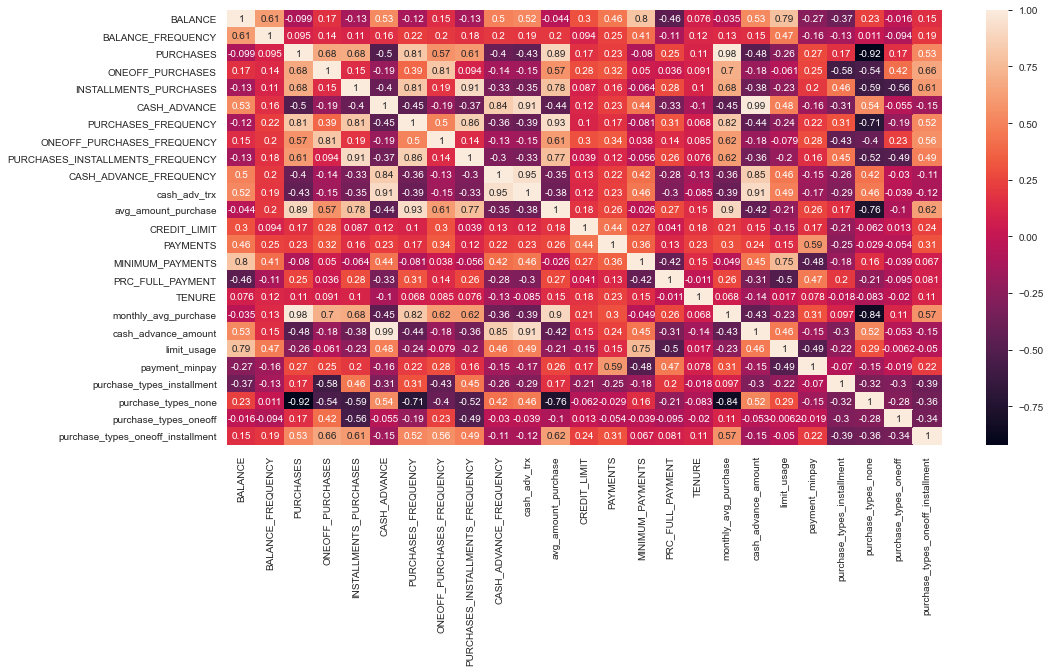

In [31]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (16, 8))
sns.heatmap(cust_seg.corr(),annot=True)
plt.show()

#### Standardizing the data

In [32]:
sc=StandardScaler()
cust_seg_scaled =sc.fit_transform(cust_seg)

In [33]:
pd.DataFrame(cust_seg_scaled,columns=cust_seg.columns).head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,cash_adv_trx,avg_amount_purchase,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_avg_purchase,cash_advance_amount,limit_usage,payment_minpay,purchase_types_installment,purchase_types_none,purchase_types_oneoff,purchase_types_oneoff_installment
0,-1.322538,-0.206594,-0.106248,-0.992265,0.407166,-0.933543,-0.746901,-0.732480,-0.674253,-0.756038,-0.829932,-0.581107,-1.553180,-1.266634,-0.965339,-0.556368,0.37255,-0.425318,-0.896270,-1.033734,-0.529081,1.720516,-0.543690,-0.514625,-0.670193
1,1.004660,0.163964,-1.690563,-0.992265,-1.092450,1.457528,-1.302799,-0.732480,-0.958256,0.789888,0.846122,-1.406298,0.979340,1.411925,1.050168,0.391958,0.37255,-1.542330,1.638624,0.335044,0.284699,-0.581221,1.839282,-0.514625,-0.670193
2,0.870779,0.517281,0.616216,1.085558,-1.092450,-0.933543,1.196820,2.466762,-0.958256,-0.756038,-0.829932,0.520290,1.069158,-0.266973,0.519305,-0.556368,0.37255,0.588581,-0.896270,-0.028962,-0.775444,-0.581221,-0.543690,1.943162,-0.670193
3,0.654345,-1.006802,0.845593,1.292169,-1.092450,0.576182,-1.014151,-0.363042,-0.958256,-0.201509,-0.108095,-0.885660,1.069158,-1.980466,-0.170315,-0.556368,0.37255,0.922223,0.317075,-0.380783,-1.307477,-0.581221,-0.543690,1.943162,-0.670193
4,0.272560,0.517281,-0.708031,-0.107253,-1.092450,-0.933543,-1.014151,-0.363042,-0.958256,-0.756038,-0.829932,-0.885660,-1.316009,-0.189969,-0.411014,-0.556368,0.37255,-1.110491,-0.896270,0.916186,-0.010803,-0.581221,-0.543690,1.943162,-0.670193
5,0.698540,0.517281,0.804993,-0.992265,1.269692,-0.933543,0.539335,-0.732480,0.672236,-0.756038,-0.829932,0.244084,-0.788442,0.454729,1.851237,-0.556368,0.37255,0.863015,-0.896270,1.553365,-1.051583,1.720516,-0.543690,-0.514625,-0.670193
6,0.130471,0.517281,1.185703,1.472530,1.052930,-0.933543,1.196820,2.466762,1.501139,-0.756038,-0.829932,1.643587,1.681053,1.762425,-0.620021,2.719298,0.37255,1.428861,-0.896270,-1.012061,2.099155,-0.581221,-0.543690,-0.514625,1.492109
7,0.702621,0.517281,0.418059,-0.992265,0.903444,-0.933543,1.196820,-0.732480,1.501139,-0.756038,-0.829932,0.520290,-0.469442,-0.189012,0.356331,-0.556368,0.37255,0.302831,-0.896270,1.177174,-0.615424,1.720516,-0.543690,-0.514625,-0.670193
8,0.388376,0.517281,0.653680,1.036895,0.648365,-0.933543,-0.265364,-0.363042,-0.166508,-0.756038,-0.829932,-0.060469,0.979340,-0.177027,-0.171520,-0.556368,0.37255,0.642910,-0.896270,-0.646200,-0.205142,-0.581221,-0.543690,-0.514625,1.492109
9,-0.626737,-1.440917,0.791294,1.243259,-1.092450,-0.933543,-0.746901,-0.020992,-0.958256,-0.756038,-0.829932,-0.365022,1.567771,0.290991,-1.289652,-0.556368,0.37255,0.843050,-0.896270,-1.140845,1.435323,-0.581221,-0.543690,1.943162,-0.670193


#### Applyting PCA

In [34]:
pc = PCA(n_components=25)

In [35]:
pc.fit(cust_seg_scaled)

PCA(n_components=25)

In [36]:
pc.explained_variance_

array([8.61343385e+00, 4.87832669e+00, 2.73906652e+00, 2.10062795e+00,
       1.35774717e+00, 1.21059635e+00, 9.12770314e-01, 7.51991096e-01,
       6.59396643e-01, 4.83277770e-01, 3.63618166e-01, 2.24953939e-01,
       2.04410506e-01, 1.41328606e-01, 1.04587226e-01, 6.24687608e-02,
       4.77954863e-02, 3.82055031e-02, 3.75481965e-02, 3.11539076e-02,
       2.59526817e-02, 6.69930726e-03, 5.94835785e-03, 8.88602597e-04,
       7.04308774e-32])

In [37]:
 #Eigen values
sum(pc.explained_variance_)      

25.00279360822438

In [38]:
#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

In [39]:
var

array([3.44498858e-01, 1.95111265e-01, 1.09550419e-01, 8.40157298e-02,
       5.43038187e-02, 4.84184436e-02, 3.65067331e-02, 3.00762830e-02,
       2.63729187e-02, 1.93289509e-02, 1.45431015e-02, 8.99715218e-03,
       8.17550669e-03, 5.65251261e-03, 4.18302160e-03, 2.49847124e-03,
       1.91160584e-03, 1.52804937e-03, 1.50176005e-03, 1.24601707e-03,
       1.03799128e-03, 2.67942349e-04, 2.37907729e-04, 3.55401325e-05,
       2.81692032e-33])

In [40]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

In [41]:
var1

array([34.45, 53.96, 64.92, 73.32, 78.75, 83.59, 87.24, 90.25, 92.89,
       94.82, 96.27, 97.17, 97.99, 98.56, 98.98, 99.23, 99.42, 99.57,
       99.72, 99.84, 99.94, 99.97, 99.99, 99.99, 99.99])

In [42]:
pd.DataFrame({'Eigen_value': pc.explained_variance_, 'Cumm_variance':var1}, index=range(1,26)).round(4)

,Eigen_value,Cumm_variance
1,8.6134,34.45
2,4.8783,53.96
3,2.7391,64.92
4,2.1006,73.32
5,1.3577,78.75
6,1.2106,83.59
7,0.9128,87.24
8,0.7520,90.25
9,0.6594,92.89
10,0.4833,94.82


In [43]:
ax={}
N=range(3,12)
for n in N:
    pca=PCA(n_components=n)
    pca_variance=pca.fit(cust_seg_scaled)
    ax[n]=sum(pca_variance.explained_variance_ratio_)

<AxesSubplot:>

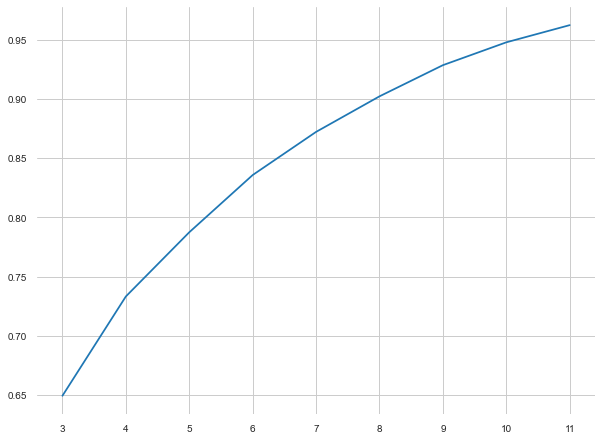

In [44]:
pd.Series(ax).plot()

#### we chose 5 components as 78 % variance is explained by it. 

In [45]:
pc_final=PCA(n_components=5).fit(cust_seg_scaled)

In [46]:
pc_final.explained_variance_

array([8.61343385, 4.87832669, 2.73906652, 2.10062795, 1.35774717])

In [47]:
reduced_cr=pc_final.transform(cust_seg_scaled)               # the output is Factors (F1, F2, ...F5)

In [48]:
dimensions = pd.DataFrame(reduced_cr)

In [49]:
dimensions

,0,1,2,3,4
0,-0.341915,-3.610381,-0.915834,-0.983364,-0.073833
1,4.537069,0.855306,-0.020814,1.938497,-1.438354
2,-1.411050,1.210092,2.596703,-2.539913,-0.467764
3,0.874776,-0.225372,2.376301,-2.050452,1.067807
4,1.205077,-1.442734,1.706695,-2.208970,-0.962830
...,...,...,...,...,...
8945,-2.448474,-3.376475,-1.662138,0.685025,2.355090
8946,-1.810422,-2.842466,-2.293202,-1.124175,2.361824
8947,-1.627548,-3.972424,-1.757287,-0.694091,2.678249
8948,3.102599,-4.064787,0.420134,0.520276,1.783431


In [50]:
dimensions.columns = ["C1", "C2", "C3", "C4", "C5"]

In [51]:
dimensions.head()

,C1,C2,C3,C4,C5
0,-0.341915,-3.610381,-0.915834,-0.983364,-0.073833
1,4.537069,0.855306,-0.020814,1.938497,-1.438354
2,-1.411050,1.210092,2.596703,-2.539913,-0.467764
3,0.874776,-0.225372,2.376301,-2.050452,1.067807
4,1.205077,-1.442734,1.706695,-2.208970,-0.962830


#### Factor Loading Matrix

- Loadings=Eigenvectors * sqrt(Eigenvalues)

In [52]:
Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=cust_seg.columns).T

In [53]:
Loadings.to_csv("Loadings.csv")

#### Clustering

In [54]:
#selected the list variables from PCA based on factor loading matrics
list_var = ['monthly_avg_purchase','BALANCE','purchase_types_oneoff','payment_minpay','TENURE']

In [55]:
cust_seg_scaled1=pd.DataFrame(cust_seg_scaled, columns=cust_seg.columns)

cust_seg_scaled2=cust_seg_scaled1[list_var]
cust_seg_scaled2.head(5)

,monthly_avg_purchase,BALANCE,purchase_types_oneoff,payment_minpay,TENURE
0,-0.425318,-1.322538,-0.514625,-0.529081,0.37255
1,-1.542330,1.004660,-0.514625,0.284699,0.37255
2,0.588581,0.870779,1.943162,-0.775444,0.37255
3,0.922223,0.654345,1.943162,-1.307477,0.37255
4,-1.110491,0.272560,1.943162,-0.010803,0.37255


### Segmentation

In [56]:
# km_3.labels
km_3=KMeans(n_clusters=3,random_state=123).fit(cust_seg_scaled2)

# km_4.labels
km_4=KMeans(n_clusters=4,random_state=123).fit(cust_seg_scaled2)

# km_5.labels
km_5=KMeans(n_clusters=5,random_state=123).fit(cust_seg_scaled2)

# km_6.labels_
km_6=KMeans(n_clusters=6,random_state=123).fit(cust_seg_scaled2)
 
# km_7.labels_
km_7=KMeans(n_clusters=7,random_state=123).fit(cust_seg_scaled2)

# km_8.labels_
km_8=KMeans(n_clusters=8,random_state=123).fit(cust_seg_scaled2)

# km_9.labels_
km_9=KMeans(n_clusters=9,random_state=123).fit(cust_seg_scaled2)

# km_10.labels_
km_10=KMeans(n_clusters=10,random_state=123).fit(cust_seg_scaled2)

In [57]:
cluster_df = pd.concat([cust_seg,pd.Series(km_3.labels_,name='Cluster_3')],axis=1)

# save the cluster labels and sort by cluster
cluster_df['Cluster_4'] = km_4.labels_
cluster_df['Cluster_5'] = km_5.labels_
cluster_df['Cluster_6'] = km_6.labels_
cluster_df['Cluster_7'] = km_7.labels_
cluster_df['Cluster_8'] = km_8.labels_
cluster_df['Cluster_9'] = km_9.labels_
cluster_df['Cluster_10'] = km_10.labels_

In [58]:
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,cash_adv_trx,avg_amount_purchase,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_avg_purchase,cash_advance_amount,limit_usage,payment_minpay,purchase_types_installment,purchase_types_none,purchase_types_oneoff,purchase_types_oneoff_installment,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,Cluster_10
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,0.040086,0.894662,1,0,0,0,0,0,4,5,5,0,7,5
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.444227,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.055726,0.376719,1.574068,0,1,0,0,1,1,3,3,3,1,4,4
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,1,0,2,3,0,0,6,5,6,8
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,4.510737,5.747301,0.000000,2.564949,4.835620,2.898616,0.200671,0.244798,0,0,1,0,2,3,0,0,6,5,6,8
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,0.519644,1.327360,0,0,1,0,2,3,0,0,6,5,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.384170,0.693147,5.677165,0.000000,5.677165,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.788719,4.326040,0.405465,2.197225,3.902377,0.000000,0.028095,2.036042,1,0,0,0,0,2,2,2,2,2,3,3
8946,3.004851,0.693147,5.707110,0.000000,5.707110,0.000000,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,6.908755,5.623517,5.747301,0.000000,2.197225,3.931826,0.000000,0.019002,0.632971,1,0,0,0,0,2,2,2,2,2,3,3
8947,3.194529,0.606136,4.979489,0.000000,4.979489,0.000000,0.606136,0.000000,0.510826,0.000000,0.000000,1.791759,6.908755,4.510737,4.423869,0.223144,2.197225,3.221539,0.000000,0.023129,0.686161,1,0,0,0,0,2,2,2,2,2,3,3
8948,2.671218,0.606136,0.000000,0.000000,0.000000,3.625907,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,6.908755,4.510737,4.326040,0.223144,2.197225,0.000000,1.959127,0.026559,0.663978,0,1,0,0,1,2,2,2,2,2,3,9


#### Choosing number clusters using Silhouette Coefficient

In [59]:
# calculate SC for K=3 through K=12
k_range = range(3, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(cust_seg_scaled2)
    scores.append(metrics.silhouette_score(cust_seg_scaled2, km.labels_))

In [60]:
scores

[0.2894232446564777,
 0.3270337571998801,
 0.35230034435115476,
 0.37831686494318584,
 0.39497355540405615,
 0.40223925707344055,
 0.4063551228404642,
 0.4079847394100231,
 0.41411116755830557]

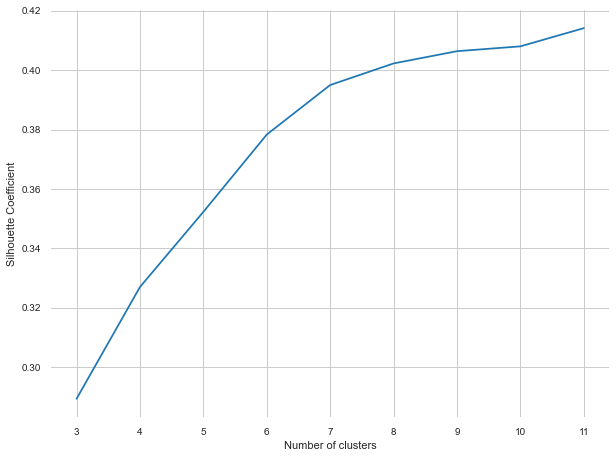

In [61]:
# plotting the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### The solution can be 8, 9 or 10 as there is minimal variation in SC score after Cluster 8. 
- We will follow the approach of segment distribution and Profiling to get the number of clusters.

#### Segment Distribution

In [62]:
cluster_df.Cluster_8.value_counts()/sum(cluster_df.Cluster_8.value_counts())

4    0.210168
6    0.163240
1    0.154078
0    0.138547
5    0.113408
2    0.083352
3    0.077877
7    0.059330
Name: Cluster_8, dtype: float64

In [63]:
cluster_df.Cluster_9.value_counts()/sum(cluster_df.Cluster_9.value_counts())

1    0.210168
5    0.163352
4    0.154078
7    0.138436
6    0.104916
3    0.082793
2    0.059330
0    0.050391
8    0.036536
Name: Cluster_9, dtype: float64

In [64]:
cluster_df.Cluster_10.value_counts()/sum(cluster_df.Cluster_10.value_counts())

0    0.210056
1    0.162793
4    0.153520
5    0.138547
8    0.104581
7    0.059218
3    0.055084
6    0.049832
2    0.036536
9    0.029832
Name: Cluster_10, dtype: float64

### Profiling

In [65]:
size=pd.concat([pd.Series(cluster_df.Cluster_3.size), pd.Series.sort_index(cluster_df.Cluster_3.value_counts()), pd.Series.sort_index(cluster_df.Cluster_4.value_counts()),
           pd.Series.sort_index(cluster_df.Cluster_5.value_counts()), pd.Series.sort_index(cluster_df.Cluster_6.value_counts()),
           pd.Series.sort_index(cluster_df.Cluster_7.value_counts()), pd.Series.sort_index(cluster_df.Cluster_8.value_counts()),
           pd.Series.sort_index(cluster_df.Cluster_9.value_counts()), pd.Series.sort_index(cluster_df.Cluster_10.value_counts())])

In [66]:
size

0    8950
0    3440
1    3636
2    1874
0    3139
1    3325
2     785
3    1701
0    1701
1    2150
2     779
3    1846
4    2474
0    1701
1    1900
2     762
3    1781
4    1509
5    1297
0     699
1    1900
2     751
3    1781
4    1509
5    1297
6    1013
0    1240
1    1379
2     746
3     697
4    1881
5    1015
6    1461
7     531
0     451
1    1881
2     531
3     741
4    1379
5    1462
6     939
7    1239
8     327
0    1880
1    1457
2     327
3     493
4    1374
5    1240
6     446
7     530
8     936
9     267
dtype: int64

In [67]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/cluster_df.Cluster_10.size, columns=['Seg_Pct'])
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,9
Seg_size,8950,3440,3636,1874,3139,3325,785,1701,1701,2150,779,1846,2474,1701,1900,762,1781,1509,1297,699,1900,751,1781,1509,1297,1013,1240,1379,746,697,1881,1015,1461,531,451,1881,531,741,1379,1462,939,1239,327,1880,1457,327,493,1374,1240,446,530,936,267


In [68]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,9
Seg_Pct,1.0,0.384358,0.406257,0.209385,0.350726,0.371508,0.087709,0.190056,0.190056,0.240223,0.087039,0.206257,0.276425,0.190056,0.212291,0.08514,0.198994,0.168603,0.144916,0.078101,0.212291,0.083911,0.198994,0.168603,0.144916,0.113184,0.138547,0.154078,0.083352,0.077877,0.210168,0.113408,0.16324,0.05933,0.050391,0.210168,0.05933,0.082793,0.154078,0.163352,0.104916,0.138436,0.036536,0.210056,0.162793,0.036536,0.055084,0.15352,0.138547,0.049832,0.059218,0.104581,0.029832


In [69]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,9
Seg_size,8950.0,3440.000000,3636.000000,1874.000000,3139.000000,3325.000000,785.000000,1701.000000,1701.000000,2150.000000,779.000000,1846.000000,2474.000000,1701.000000,1900.000000,762.00000,1781.000000,1509.000000,1297.000000,699.000000,1900.000000,751.000000,1781.000000,1509.000000,1297.000000,1013.000000,1240.000000,1379.000000,746.000000,697.000000,1881.000000,1015.000000,1461.00000,531.00000,451.000000,1881.000000,531.00000,741.000000,1379.000000,1462.000000,939.000000,1239.000000,327.000000,1880.000000,1457.000000,327.000000,493.000000,1374.00000,1240.000000,446.000000,530.000000,936.000000,267.000000
Seg_Pct,1.0,0.384358,0.406257,0.209385,0.350726,0.371508,0.087709,0.190056,0.190056,0.240223,0.087039,0.206257,0.276425,0.190056,0.212291,0.08514,0.198994,0.168603,0.144916,0.078101,0.212291,0.083911,0.198994,0.168603,0.144916,0.113184,0.138547,0.154078,0.083352,0.077877,0.210168,0.113408,0.16324,0.05933,0.050391,0.210168,0.05933,0.082793,0.154078,0.163352,0.104916,0.138436,0.036536,0.210056,0.162793,0.036536,0.055084,0.15352,0.138547,0.049832,0.059218,0.104581,0.029832


In [70]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([cluster_df.apply(lambda x: x.mean()).T, cluster_df.groupby('Cluster_3').apply(lambda x: x.mean()).T, cluster_df.groupby('Cluster_4').apply(lambda x: x.mean()).T,
          cluster_df.groupby('Cluster_5').apply(lambda x: x.mean()).T, cluster_df.groupby('Cluster_6').apply(lambda x: x.mean()).T,
          cluster_df.groupby('Cluster_7').apply(lambda x: x.mean()).T, cluster_df.groupby('Cluster_8').apply(lambda x: x.mean()).T,
          cluster_df.groupby('Cluster_9').apply(lambda x: x.mean()).T, cluster_df.groupby('Cluster_10').apply(lambda x: x.mean()).T], axis=1)

In [71]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,9
BALANCE,6.199826,4.965318,7.397007,6.143131,5.038173,7.439256,5.679072,6.161093,6.161093,7.508104,5.701565,7.265505,4.451235,6.161093,7.520034,5.744685,7.372734,5.828120,3.405886,4.462519,7.520034,5.744501,7.372734,5.828120,3.405886,7.328773,3.416502,7.511011,5.741739,4.451060,7.522512,7.330994,5.819511,6.432122,5.503950,7.522512,6.432122,5.751851,7.511011,5.818429,7.427093,3.415840,3.389120,7.522951,5.822181,3.400847,5.410642,7.515222,3.416062,5.500116,6.437142,7.423149,6.397804
BALANCE_FREQUENCY,0.625039,0.594480,0.666389,0.600904,0.597673,0.672917,0.574398,0.605320,0.605320,0.686165,0.575886,0.656614,0.577392,0.605320,0.686416,0.577467,0.661957,0.638618,0.522441,0.503699,0.686416,0.578299,0.661957,0.638618,0.522441,0.674523,0.529321,0.669178,0.578682,0.502644,0.687091,0.674911,0.643591,0.593529,0.557362,0.687091,0.593529,0.579549,0.669178,0.643363,0.679210,0.529498,0.454068,0.686940,0.643575,0.455716,0.592066,0.669457,0.529917,0.556946,0.594964,0.679348,0.552519
PURCHASES,4.874881,6.179654,3.160170,5.806721,6.273427,3.289937,4.005726,5.793277,5.793277,6.867695,4.022595,0.343662,6.160984,5.793277,6.758621,4.009133,0.274492,7.201279,5.029978,5.998024,6.758621,3.969711,0.274492,7.201279,5.029978,5.661848,5.271523,0.330160,3.996318,6.007077,6.778898,5.656293,7.384416,0.356199,6.672596,6.778898,0.356199,3.987114,0.330160,7.383665,5.658703,5.270705,4.990855,6.779720,7.384163,4.996330,6.012951,0.331361,5.277333,6.672212,0.365623,5.651811,0.256680
ONEOFF_PURCHASES,3.176565,3.271206,1.739050,5.791955,3.430514,1.827163,2.239218,5.778232,5.778232,4.467312,2.257426,0.027488,2.905209,5.778232,4.195197,2.281679,0.020611,5.100872,0.892867,5.975520,4.195197,2.217491,0.020611,5.100872,0.892867,5.651716,0.943313,0.024249,2.232353,5.984509,4.224567,5.646181,5.261251,0.050096,6.632296,4.224567,0.050096,2.211273,0.024249,5.257652,5.650355,0.944074,4.990855,4.226294,5.265252,4.996330,3.463791,0.024337,0.938634,6.631504,0.050210,5.643868,0.028600
INSTALLMENTS_PURCHASES,3.328094,5.636348,2.859573,0.000000,5.704177,2.975325,2.532585,0.000000,0.000000,6.089521,2.537705,0.342553,5.693108,0.000000,6.036188,2.495242,0.274715,6.341892,4.901412,0.000000,6.036188,2.531790,0.274715,6.341892,4.901412,0.000000,5.135696,0.330438,2.548759,0.000000,6.051802,0.000000,6.497844,0.347164,0.000000,6.051802,0.347164,2.565957,0.330438,6.497699,0.000000,5.134768,0.000000,6.052573,6.496600,0.000000,3.761490,0.331641,5.142078,0.000000,0.356570,0.000000,0.250235
CASH_ADVANCE,3.296870,1.482875,5.208875,2.916981,1.475042,5.019258,4.291906,2.832833,2.832833,3.325268,4.293836,6.419167,0.947586,2.832833,3.355339,4.372268,6.532379,1.672066,0.635473,1.295630,3.355339,4.358269,6.532379,1.672066,0.635473,3.920645,0.362782,6.346597,4.332922,1.277289,3.352166,3.928067,1.508556,6.941873,2.159143,3.352166,6.941873,4.350763,6.346597,1.507524,3.990762,0.363075,0.503375,3.348169,1.512697,0.503375,2.950163,6.344342,0.358727,2.147825,6.930431,3.976380,7.020582
PURCHASES_FREQUENCY,0.361268,0.523740,0.261307,0.256974,0.526164,0.269302,0.316404,0.257441,0.257441,0.566909,0.317394,0.021032,0.521628,0.257441,0.558394,0.315227,0.015907,0.589927,0.443913,0.288085,0.558394,0.316331,0.015907,0.589927,0.443913,0.236104,0.464837,0.019734,0.318451,0.288321,0.561014,0.236044,0.605156,0.023019,0.326154,0.561014,0.023019,0.319213,0.019734,0.604938,0.235494,0.464980,0.224307,0.560886,0.605034,0.226027,0.477478,0.019806,0.465723,0.326302,0.024118,0.235228,0.018127
ONEOFF_PURCHASES_FREQUENCY,0.158699,0.185599,0.082692,0.256791,0.195635,0.086455,0.103477,0.257239,0.257239,0.228951,0.104274,0.000771,0.164872,0.257239,0.207055,0.105050,0.000578,0.308631,0.032834,0.287880,0.207055,0.103076,0.000578,0.308631,0.032834,0.235908,0.034472,0.000630,0.103766,0.288116,0.208977,0.235848,0.318438,0.001517,0.326154,0.208977,0.001517,0.103080,0.000630,0.318220,0.235282,0.034500,0.223869,0.208872,0.318567,0.225589,0.16

In [72]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [73]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,2,3,4,0,1,2,3,4,5,0,1,2,3,4,5,6,0,1,2,3,4,5,6,7,0,1,2,3,4,5,6,7,8,0,1,2,3,4,5,6,7,8,9
Seg_size,8950.000000,3440.000000,3636.000000,1874.000000,3139.000000,3325.000000,785.000000,1701.000000,1701.000000,2150.000000,779.000000,1846.000000,2474.000000,1701.000000,1900.000000,762.000000,1781.000000,1509.000000,1297.000000,699.000000,1900.000000,751.000000,1781.000000,1509.000000,1297.000000,1013.000000,1240.000000,1379.000000,746.000000,697.000000,1881.000000,1015.000000,1461.000000,531.000000,451.000000,1881.000000,531.000000,741.000000,1379.000000,1462.000000,939.000000,1239.000000,327.000000,1880.000000,1457.000000,327.000000,493.000000,1374.000000,1240.000000,446.000000,530.000000,936.000000,267.000000
Seg_Pct,1.000000,0.384358,0.406257,0.209385,0.350726,0.371508,0.087709,0.190056,0.190056,0.240223,0.087039,0.206257,0.276425,0.190056,0.212291,0.085140,0.198994,0.168603,0.144916,0.078101,0.212291,0.083911,0.198994,0.168603,0.144916,0.113184,0.138547,0.154078,0.083352,0.077877,0.210168,0.113408,0.163240,0.059330,0.050391,0.210168,0.059330,0.082793,0.154078,0.163352,0.104916,0.138436,0.036536,0.210056,0.162793,0.036536,0.055084,0.153520,0.138547,0.049832,0.059218,0.104581,0.029832
BALANCE,6.199826,4.965318,7.397007,6.143131,5.038173,7.439256,5.679072,6.161093,6.161093,7.508104,5.701565,7.265505,4.451235,6.161093,7.520034,5.744685,7.372734,5.828120,3.405886,4.462519,7.520034,5.744501,7.372734,5.828120,3.405886,7.328773,3.416502,7.511011,5.741739,4.451060,7.522512,7.330994,5.819511,6.432122,5.503950,7.522512,6.432122,5.751851,7.511011,5.818429,7.427093,3.415840,3.389120,7.522951,5.822181,3.400847,5.410642,7.515222,3.416062,5.500116,6.437142,7.423149,6.397804
BALANCE_FREQUENCY,0.625039,0.594480,0.666389,0.600904,0.597673,0.672917,0.574398,0.605320,0.605320,0.686165,0.575886,0.656614,0.577392,0.605320,0.686416,0.577467,0.661957,0.638618,0.522441,0.503699,0.686416,0.578299,0.661957,0.638618,0.522441,0.674523,0.529321,0.669178,0.578682,0.502644,0.687091,0.674911,0.643591,0.593529,0.557362,0.687091,0.593529,0.579549,0.669178,0.643363,0.679210,0.529498,0.454068,0.686940,0.643575,0.455716,0.592066,0.669457,0.529917,0.556946,0.594964,0.679348,0.552519
PURCHASES,4.874881,6.179654,3.160170,5.806721,6.273427,3.289937,4.005726,5.793277,5.793277,6.867695,4.022595,0.343662,6.160984,5.793277,6.758621,4.009133,0.274492,7.201279,5.029978,5.998024,6.758621,3.969711,0.274492,7.201279,5.029978,5.661848,5.271523,0.330160,3.996318,6.007077,6.778898,5.656293,7.384416,0.356199,6.672596,6.778898,0.356199,3.987114,0.330160,7.383665,5.658703,5.270705,4.990855,6.779720,7.384163,4.996330,6.012951,0.331361,5.277333,6.672212,0.365623,5.651811,0.256680
ONEOFF_PURCHASES,3.176565,3.271206,1.739050,5.791955,3.430514,1.827163,2.239218,5.778232,5.778232,4.467312,2.257426,0.027488,2.905209,5.778232,4.195197,2.281679,0.020611,5.100872,0.892867,5.975520,4.195197,2.217491,0.020611,5.100872,0.892867,5.651716,0.943313,0.024249,2.232353,5.984509,4.224567,5.646181,5.261251,0.050096,6.632296,4.224567,0.050096,2.211273,0.024249,5.257652,5.650355,0.944074,4.990855,4.226294,5.265252,4.996330,3.463791,0.024337,0.938634,6.631504,0.050210,5.643868,0.028600
INSTALLMENTS_PURCHASES,3.328094,5.636348,2.859573,0.000000,5.704177,2.975325,2.532585,0.000000,0.000000,6.089521,2.537705,0.342553,5.693108,0.000000,6.036188,2.495242,0.274715,6.341892,4.901412,0.000000,6.036188,2.531790,0.274715,6.341892,4.901412,0.000000,5.135696,0.330438,2.548759,0.000000,6.051802,0.000000,6.497844,0.347164,0.000000,6.051802,0.347164,2.565957,0.330438,6.497699,0.000000,5.134768,0.000000,6.052573,6.496600,0.000000,3.761490,0.331641,5.142078,0.000000,0.356570,0.000000,0.250235
CASH_ADVANCE,3.296870,1.482875,5.208875,2.916981,1.475042,5.019258,4.291906,2.832833,2.832833,3.325268,4.293836,6.419167,0.947586,2.832833,3.355339,4.372268,6.532379,1.672066,0.635473,1.295630,3.355339,4.358269,6.532379,1.672066,0.635473,3.920645,0.362782,6.346597,4.332922,1.277289,3.352166,3.928067,1.508556,6.941873,2.

In [74]:
# Profling_output_final.columns 
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',
                                'KM9_1', 'KM9_2', 'KM9_3', 'KM9_4', 'KM9_5','KM9_6','KM9_7','KM9_8','KM9_9',
                                'KM10_1', 'KM10_2', 'KM10_3', 'KM10_4', 'KM10_5','KM10_6','KM10_7','KM10_8','KM10_9','KM10_10']

In [75]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,KM5_3,KM5_4,KM5_5,KM6_1,KM6_2,KM6_3,KM6_4,KM6_5,KM6_6,KM7_1,KM7_2,KM7_3,KM7_4,KM7_5,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8,KM9_1,KM9_2,KM9_3,KM9_4,KM9_5,KM9_6,KM9_7,KM9_8,KM9_9,KM10_1,KM10_2,KM10_3,KM10_4,KM10_5,KM10_6,KM10_7,KM10_8,KM10_9,KM10_10
Seg_size,8950.000000,3440.000000,3636.000000,1874.000000,3139.000000,3325.000000,785.000000,1701.000000,1701.000000,2150.000000,779.000000,1846.000000,2474.000000,1701.000000,1900.000000,762.000000,1781.000000,1509.000000,1297.000000,699.000000,1900.000000,751.000000,1781.000000,1509.000000,1297.000000,1013.000000,1240.000000,1379.000000,746.000000,697.000000,1881.000000,1015.000000,1461.000000,531.000000,451.000000,1881.000000,531.000000,741.000000,1379.000000,1462.000000,939.000000,1239.000000,327.000000,1880.000000,1457.000000,327.000000,493.000000,1374.000000,1240.000000,446.000000,530.000000,936.000000,267.000000
Seg_Pct,1.000000,0.384358,0.406257,0.209385,0.350726,0.371508,0.087709,0.190056,0.190056,0.240223,0.087039,0.206257,0.276425,0.190056,0.212291,0.085140,0.198994,0.168603,0.144916,0.078101,0.212291,0.083911,0.198994,0.168603,0.144916,0.113184,0.138547,0.154078,0.083352,0.077877,0.210168,0.113408,0.163240,0.059330,0.050391,0.210168,0.059330,0.082793,0.154078,0.163352,0.104916,0.138436,0.036536,0.210056,0.162793,0.036536,0.055084,0.153520,0.138547,0.049832,0.059218,0.104581,0.029832
BALANCE,6.199826,4.965318,7.397007,6.143131,5.038173,7.439256,5.679072,6.161093,6.161093,7.508104,5.701565,7.265505,4.451235,6.161093,7.520034,5.744685,7.372734,5.828120,3.405886,4.462519,7.520034,5.744501,7.372734,5.828120,3.405886,7.328773,3.416502,7.511011,5.741739,4.451060,7.522512,7.330994,5.819511,6.432122,5.503950,7.522512,6.432122,5.751851,7.511011,5.818429,7.427093,3.415840,3.389120,7.522951,5.822181,3.400847,5.410642,7.515222,3.416062,5.500116,6.437142,7.423149,6.397804
BALANCE_FREQUENCY,0.625039,0.594480,0.666389,0.600904,0.597673,0.672917,0.574398,0.605320,0.605320,0.686165,0.575886,0.656614,0.577392,0.605320,0.686416,0.577467,0.661957,0.638618,0.522441,0.503699,0.686416,0.578299,0.661957,0.638618,0.522441,0.674523,0.529321,0.669178,0.578682,0.502644,0.687091,0.674911,0.643591,0.593529,0.557362,0.687091,0.593529,0.579549,0.669178,0.643363,0.679210,0.529498,0.454068,0.686940,0.643575,0.455716,0.592066,0.669457,0.529917,0.556946,0.594964,0.679348,0.552519
PURCHASES,4.874881,6.179654,3.160170,5.806721,6.273427,3.289937,4.005726,5.793277,5.793277,6.867695,4.022595,0.343662,6.160984,5.793277,6.758621,4.009133,0.274492,7.201279,5.029978,5.998024,6.758621,3.969711,0.274492,7.201279,5.029978,5.661848,5.271523,0.330160,3.996318,6.007077,6.778898,5.656293,7.384416,0.356199,6.672596,6.778898,0.356199,3.987114,0.330160,7.383665,5.658703,5.270705,4.990855,6.779720,7.384163,4.996330,6.012951,0.331361,5.277333,6.672212,0.365623,5.651811,0.256680
ONEOFF_PURCHASES,3.176565,3.271206,1.739050,5.791955,3.430514,1.827163,2.239218,5.778232,5.778232,4.467312,2.257426,0.027488,2.905209,5.778232,4.195197,2.281679,0.020611,5.100872,0.892867,5.975520,4.195197,2.217491,0.020611,5.100872,0.892867,5.651716,0.943313,0.024249,2.232353,5.984509,4.224567,5.646181,5.261251,0.050096,6.632296,4.224567,0.050096,2.211273,0.024249,5.257652,5.650355,0.944074,4.990855,4.226294,5.265252,4.996330,3.463791,0.024337,0.938634,6.631504,0.050210,5.643868,0.028600
INSTALLMENTS_PURCHASES,3.328094,5.636348,2.859573,0.000000,5.704177,2.975325,2.532585,0.000000,0.000000,6.089521,2.537705,0.342553,5.693108,0.000000,6.036188,2.495242,0.274715,6.341892,4.901412,0.000000,6.036188,2.531790,0.274715,6.341892,4.901412,0.000000,5.135696,0.330438,2.548759,0.000000,6.051802,0.000000,6.497844,0.347164,0.000000,6.051802,0.347164,2.565957,0.330438,6.497699,0.000000,5.134768,0.000000,6.052573,6.496600,0.000000,3.761490,0.331641,5.142078,0.000000,0.356570,0.000000,0.250235
CASH_ADVANCE,3.296870,1.482875,5.208875,2.916981,1.475042,5.019258,4.291906,2.832833,2.832833,3.

In [76]:
Profling_output_final.to_csv('Profiling_output.csv')

#### Elbow Analysis


In [77]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( cust_seg_scaled2 )
    cluster_errors.append( clusters.inertia_ )

In [78]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,44750.000000
1,2,35441.309998
2,3,27987.450745
3,4,21437.667751
4,5,17241.028186
5,6,14285.820971
6,7,12551.827433
7,8,11355.914448
8,9,10462.924475
9,10,9714.526242


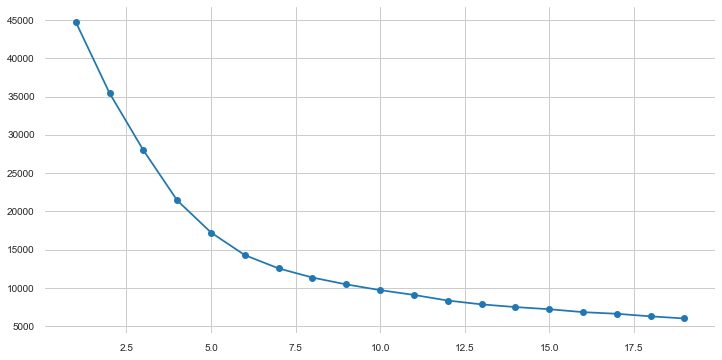

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#### Note:
- The elbow diagram shows that the gain in explained variance reduces significantly from 8 to 9. So, optimal number of clusters could either 8 or 9.
- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

### Considering the SC score, profiling summary and elbow analysis : we can choose Cluster 8 to be our best solution and we can predict the new data using K = 8. 